Importerar biblioteket pandas för att jobba med tabeller

In [3]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\liamc\AppData\Local\Programs\Python\Python313\python.exe
3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]


In [1]:
import pandas as pd

Läser in filen och sparas i df

In [2]:
df = pd.read_csv(r"C:\Users\liamc\OneDrive\Desktop\car_price_dataset (1).csv", sep=";")


Tittar på datan

In [3]:
df.head()



,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Kollar storlek och datatyper

In [4]:
df.shape


(10000, 10)

In [5]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

Kontrollerar kolumnerna

In [6]:
df.columns


Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

Skapar y (target/label)

In [61]:
y = df["Price"]

Skapar X (input/features)

In [62]:
x =df.drop(columns=["Price"])


Kontrollerar

In [56]:
x.head()



,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3


In [16]:
y.head()


0     8501
1    12092
2    11171
3    11780
4     2867
Name: Price, dtype: int64

In [17]:
x.shape

(10000, 9)

In [18]:
y.shape

(10000,)

Delar upp datan i tre separata delar: train, validation och test. 

Steg 1. train +temp (60%)
Steg 2.  dela temp i val och test(40%)


In [22]:
import sys
print(sys.executable)

c:\Users\liamc\AppData\Local\Programs\Python\Python313\python.exe


In [24]:
!"{sys.executable}" -m pip install -U pip
!"{sys.executable}" -m pip install scikit-learn pandas numpy matplotlib


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 14.2 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 15.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 13.2 MB/s  0:00:00
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   --- ------------------------------------ 2.9/36.3 MB 14.4 MB/s eta 0:00:03
   ------ --------------------------------- 5.5/36.3 MB 13.7 MB/s eta 0:00:03
   -------- -

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42
)

In [64]:
X_val, X_test, Y_val, Y_test, = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

Kontroll

In [27]:
X_train.shape, X_val.shape, X_test.shape

((6000, 9), (2000, 9), (2000, 9))

In [28]:
y_train.shape, Y_val.shape, Y_test.shape

((6000,), (2000,), (2000,))

EDA (utforskar datan)

Saknade värden

In [29]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

Ptisfördelning

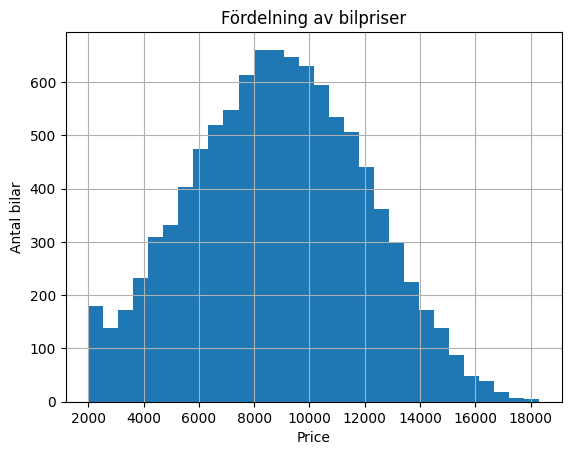

In [30]:
import matplotlib.pyplot as plt

plt.figure()
df["Price"].hist(bins=30)
plt.title("Fördelning av bilpriser")
plt.xlabel("Price")
plt.ylabel("Antal bilar")
plt.show()

Mileage vs Price

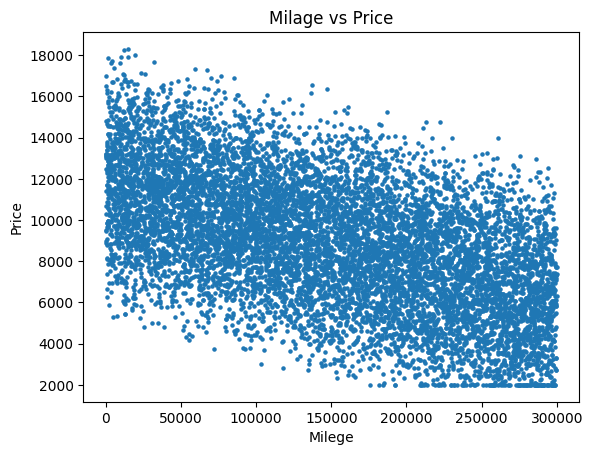

In [32]:
plt.figure()
plt.scatter(df["Mileage"], df["Price"], s=5)
plt.title("Milage vs Price")
plt.xlabel("Milege")
plt.ylabel("Price")
plt.show()

Year vs Price

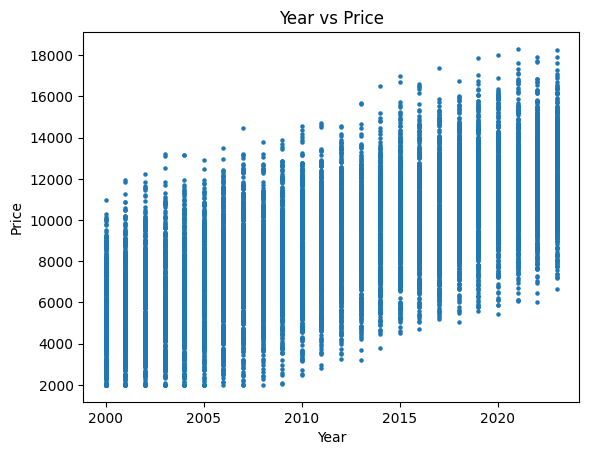

In [33]:
plt.figure()
plt.scatter(df["Year"], df["Price"], s=5)
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

Medelpris per Fuel_Type

In [34]:
df.groupby("Fuel_Type")["Price"].mean().sort_values()

Fuel_Type
Petrol       8070.561826
Diesel       8117.336385
Hybrid       9113.030167
Electric    10032.220190
Name: Price, dtype: float64

Preprocessing
1. Delar upp i kolumner i siffror och text
2. Hanterar saknade värden (EDA visade att det inte fanns några saknade värden men väljer att göra detta vid eventuell framtida data)
3. Gör text till siffror så att modellen förstår



Identifierar kolumnerna

In [35]:
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X.select_dtypes(exclude=["number"]).columns.tolist()

numeric_features, categorical_features


(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count'],
 ['Brand', 'Model', 'Fuel_Type', 'Transmission'])

Skapar preprocessing för numeriska kolumner (fyller i tomma värden med median, skala siffrorna)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


Skapa preprocessing för kategoriska kolumner (fyller tomma textvärden, gör text till iffror, ignorerar nya kategorier)

In [37]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


Kombinera allt med ColumnTransformer (en gemnesam preprocessing maskin, som kan användas i alla modeller)

In [38]:
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


testar

In [39]:
preprocess


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

Bygger och tränar tre modeller och GridSerchCV




In [40]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Modell 1: Ridge och GridSearch

In [43]:
ridge_pipe =Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Ridge())
])

ridge_params ={
    "model__alpha": [0.1, 1, 10, 50, 100]
}

ridge_grid = GridSearchCV(
    ridge_pipe,
    ridge_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

print("Ridge best RMSE (CV):", -ridge_grid.best_score_)
print("Ridge best params:", ridge_grid.best_params_)


Ridge best RMSE (CV): 89.06341198943377
Ridge best params: {'model__alpha': 0.1}


Modell 2: Random Forest och GridSearch

In [44]:
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

rf_params = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    rf_pipe,
    rf_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("RF best RMSE (CV):", -rf_grid.best_score_)
print("RF best params:", rf_grid.best_params_)


RF best RMSE (CV): 404.6421621421297
RF best params: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 500}


Modell 3: Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

gbr_params = {
    "model__n_estimators": [200, 500],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3]
}

gbr_grid = GridSearchCV(
    gbr_pipe,
    gbr_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

gbr_grid.fit(X_train, y_train)

print("GBR best RMSE (CV):", -gbr_grid.best_score_)
print("GBR best params:", gbr_grid.best_params_)


GBR best RMSE (CV): 148.74150752920247
GBR best params: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 500}


Ridge bäst hittills, lägre RMSE


Validation set

In [46]:
ridge_grid.best_estimator_
rf_grid.best_estimator_
gbr_grid.best_estimator_


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [47]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


Samlar modellerna

In [48]:
models = {
    "Ridge": ridge_grid.best_estimator_,
    "Random Forest": rf_grid.best_estimator_,
    "Gradient Boosting": gbr_grid.best_estimator_
}


Kör modellerna på valitation set

In [58]:
val_results = {}

for name, model in models.items():
    preds = model.predict(X_val)
    val_results[name] = rmse(Y_val, preds)

val_results

{'Ridge': np.float64(77.63905466323646),
 'Random Forest': np.float64(363.0744336958356),
 'Gradient Boosting': np.float64(135.18145947289477)}

Ridge Regression gav läst RMSE och väljer därför den som slutlig modell. 

In [59]:
best_model_name = min(val_results, key=val_results.get)
best_model = models[best_model_name]

best_model_name, val_results[best_model_name]


('Ridge', np.float64(77.63905466323646))

Testar den valde modellen på testdatan

In [67]:
test_preds = best_model.predict(X_test)
test_rmse = rmse(Y_test, test_preds)
test_rmse


np.float64(76.72170779553241)

Ridge Regression valdes som slutlig modell eftersom den gav läsgt RMSE på valideringsdatan jämfört med de andra modellerna. Resultet på testdatan var ungefär lika bra, vilket tyder på att modellen fungerar bra även på ny data och inte är överanpassad.